<a href="https://colab.research.google.com/github/octavianosilva/data_science/blob/main/Churn_Prediction_em_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction

<center><img alt="Customer Success"  src='https://dccomunic.com.br/wp-content/uploads/2020/09/Customer-success-o-que-e-e-quais-sao-as-vantagens-dessa-estrategia-para-o-seu-negocio-650x427.jpg'></center>

No mundo dos negócios, empresas em que os clientes confiam na marca são as que mais crescem e se estabilizam no mercado, e isso se deve ao fato dessas empresas conseguirem reter esses clientes por meio de várias estratégias, que usam o Churn como base.

Quando vemos uma empresa conquistar vários clientes, logo pensamos que ela é uma marca poderosa, porém nem toda empresa que recebe muitos clientes se torna sucedida, pois pode ser o caso de uma empresa que recebe vários clientes novos, mas que consegue reter apenas uma minoria destes.

Para todo empresário, é conhecimento comum que o Custo de Aquisição de Cliente (CAC) pode ser até 15 vezes maior que reter um cliente atual, por isso que ter clientes fiéis à marca resulta em um negócio próspero e não o fato de receber muitos clientes.

Agora que temos uma noção da importância de um negócio em reter clientes, vamos entender o que é o Churn e por qual razão ele é essencial para desenvolver uma estratégia de negócio.

O Churn ou Churn Rate, é uma métrica que representa a taxa de perda em clientes e em receita, sendo o Churn de Receita mais conhecido como MRR Churn (Monthly Recurring Revenue).

O Churn Rate se bem explorado, é capaz de apontar os pontos críticos que influenciaram na decisão do cliente em cancelar o serviço ou produto, como por exemplo, se uma empresa tem a estratégia de abrir espaço para o feedback do cliente, ela pode tomar medidas corretivas em cima deste feedack e evitar perder futuros clientes pelos mesmos motivos. Sendo assim, empresas que investem em um bom time de Customer Success para tomar decisões e desenvolver planos estratégicos com base no Churn, serão as que prosperarão.

Com as decisões empresariais cada vez mais influenciadas por algoritmos de Machine Learning, temos como utilizar a métrica Churn para prever a chance de um cliente abandonar o serviço, ou produto, e obter insights das variáveis que mais impactam para a decisão deste cliente, e então tomar medidas estratégicas para evitar seu cancelamento no fim do contrato.

Este método é chamado de Churn Prediction e será o objetivo deste projeto, em que analisaremos os dados de uma empresa de Telecomunicações.


 


## Obtendo os Dados e Importando os Pacotes

Os dados que serão utilizados neste projeto se encontram na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e apresentam informações relacionadas a uma empresa de Telecomunicações, que podem ser obtidas através deste [link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

In [ ]:
# Ignorar os alertas de atualizações
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Pacote que contém um grupo de bibliotecas - execute "lazy_imports()" para saber quais.
!pip install pyforest -q
import pyforest

# Importações para o modelo de Machine Learning
!pip install scikit-plot -q
import scikitplot as skplt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Replicabilidade
np.random.seed(51)

# Importando os Dados
file_path = 'https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df_raw = pd.read_csv(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Análise Exploratória dos Dados

Com os dados importados vamos iniciar com uma análise sobre o comportamento e o que estes dados representam:

## Entendendo o DataSet

In [ ]:
# Analisando a quantidade de entradas e variáveis
df_raw.shape

(7043, 21)

In [ ]:
# Analisando os tipos das variáveis
df_raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Analisando a presença de dados ausentes
df_raw.isnull().values.sum()

0

Temos um DataSet com 7 mil entradas e 21 variáveis predominantemente do tipo objeto, além do mais, inicialmente não detectamos dados ausentes.

Agora vamos dar uma olhada nas primeiras entradas do DataFrame e na quantidade de valores únicos por coluna:

In [ ]:
# Observando as 5 primeiras entradas do Dataset
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Analisando a quantidade de valores únicos por coluna
df_raw.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Observando as primeiras entradas do DataFrame  e da quantidade de dados únicos de cada variável, podemos perceber que:

* Existem várias colunas binárias e categóricas, mas estão referenciadas como objeto e não valores numéricos;
* A variável `TotalCharges` está como float no DataFrame, porém é referenciada como sendo do tipo objeto;
* A variável `customerID` é apenas uma referência única para cada cliente, então não possui informações relevantes.
* A variável `Churn` é o nosso alvo, porém deveria ser binária e não do tipo objeto.

Com essas informações, vamos iniciar o tratamento destes dados:

## Tratando os Dados

Primeiramente vamos remover a variável `customerID` e depois converter as outras variáveis para tipos numéricos:

In [ ]:
# Criando um novo DataSet para os novos dados
df_tratado = df_raw.copy()

# Removendo a variável customerID
df_tratado.drop('customerID', axis=1, inplace=True)

# Converter a variável TotalCharges para float
# df_tratado['TotalCharges'] = df_tratado['TotalCharges'].astype(float)


Quando tentamos converter a variável `TotalCharges` diretamente, temos um erro causado pela existência de dados não numéricos entre as entradas, assim teremos que converter esses dados não numéricos em dados ausentes(NaN).

In [ ]:
# Criando uma função para retornar dados convertidos e NaN's
def converter_totalcharges(entrada):
  try:
    return float(entrada)
  except ValueError:
    return np.nan

# Converter a variável TotalCharges
df_tratado['TotalCharges'] = df_tratado['TotalCharges'].apply(converter_totalcharges)

# Ver a quantidade de dados ausentes presentes na variável TotalCharges
print("Quantidade de dados ausentes na variável 'TotalCharges':", df_tratado['TotalCharges'].isnull().sum())

# Preencher os valores ausentes
mediana_totalcharges = df_tratado.TotalCharges.median()
df_tratado['TotalCharges'].fillna(mediana_totalcharges, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Quantidade de dados ausentes na variável 'TotalCharges': 11


Temos que a variável `TotalCharges` possuía 11 valores ausentes, mas que agora foram preenchidos pela mediana da coluna.

Pelo método `describe` podemos observar o descritivo estatístico do DataSet:


In [ ]:
# Observando o descritivo estatístico
df_tratado.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Pelo descritivo, não há evidências de outliers no DataSet, vamos plotar o boxplot para as variáveis `MonthlyCharges` e `TotalCharges`,
vale lembrar que a variável `SeniorCitizen` é uma variável binária, mas ainda não a convertemos.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

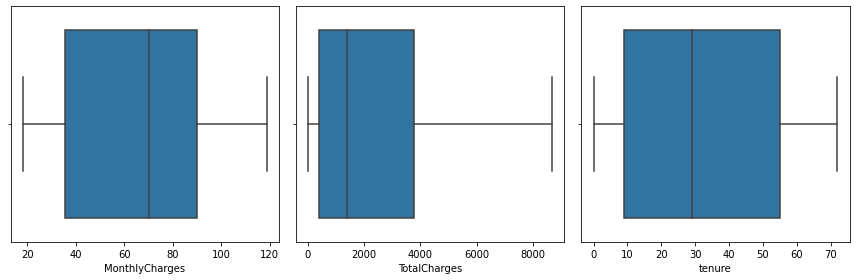

In [ ]:
# Plotar os Boxplots para as variáveis MonthlyCharges e TotalCharges
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

sns.boxplot(df_tratado['MonthlyCharges'], ax=ax[0])
sns.boxplot(df_tratado['TotalCharges'], ax=ax[1])
sns.boxplot(df_tratado['tenure'], ax=ax[2])

plt.tight_layout();
fig.savefig('boxplots')

Pelo Boxplot, a distribuição das variáveis estão dentro dos limites superiores e inferiores, então podemos concluir que não há outliers, também vemos com mais facilidade que as variáveis `MonthlyCharges` e `TotalCharges` estão com valores bem discrepantes, ou seja, teremos que padronizá-los.

A variável `tenure` não possui descrição na documentação, mas assumiremos que ela corresponde ao tempo (em meses) que um cliente permanece com o serviço contratado, as variáveis `MonthlyCharge` e `TotalCharges` reforçam essa ideia se observarmos as entradas em que `tenure` é igual a 1.

In [ ]:
# Validando a hipótese acima para as entradas em que a variável tenure = 1
validacao = df_tratado.loc[df_tratado['tenure'] ==1]
validacao = validacao[['MonthlyCharges','TotalCharges']]
validacao.head()

,MonthlyCharges,TotalCharges
0,29.85,29.85
20,39.65,39.65
22,20.15,20.15
27,30.20,30.20
33,20.20,20.20


Como assumiremos que a variável `tenure` é relacionada ao tempo, vamos plotar um countplot para ela:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

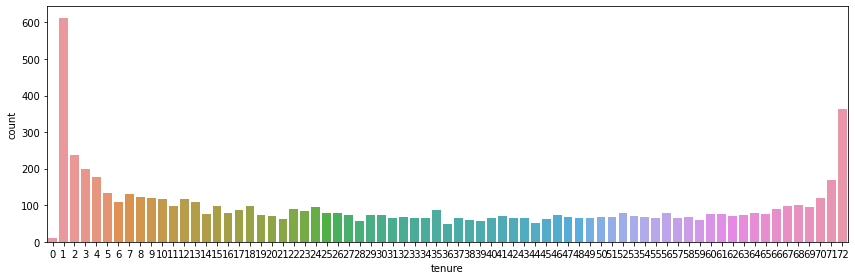

In [ ]:
# Plotando um countplot
fig, ax = plt.subplots(figsize=(12,4))

sns.countplot(df_tratado['tenure'])

plt.tight_layout();
fig.savefig('tenure_coutplot')

Agora que analisamos a presença de outliers, vamos seguir com a conversão das variáveis binárias e categóricas.

Como temos a variável `gender`, em situações em que há uma desbalanceamento nesta feature, podem ocorrer o problema de bias, onde um determinado sexo pode ser bastante prejudicado durante as previsões, causando assim grandes prejuízos, porém para o problema de Churn abordado neste projeto, esses prejuízos não causarão danos relevantes à classe injustiçada.

Vamos ao menos checar o balanceamento desta feature:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

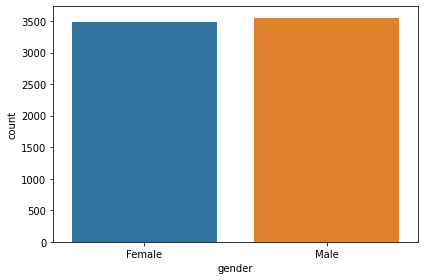

In [ ]:
# Plotando o countplot para a variável gender
fig, ax = plt.subplots()

sns.countplot(df_tratado.gender)

plt.tight_layout();

Temos que a variável `gender` está balanceada.

Agora vamos checar o balanceamento da variável alvo `Churn`, que será essencial para o modelo de Machine Learning que será desenvolvido:



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

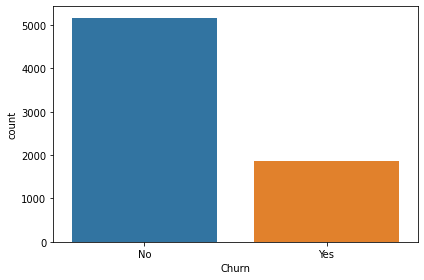

In [ ]:
# Plotando o countplot para a variável Churn
fig, ax = plt.subplots()

sns.countplot(df_tratado.Churn)

plt.tight_layout();
fig.savefig('churn_countplot')

Para a variável `Churn` vemos que existe um desbalanceamento das classes, o que pode afetar o modelo de Machine Learning que será desenvolvido.

# Preparação dos Dados

## Feature Engineering

Antes de desenvolvermos o modelo para este projeto, ainda é necessário fazer as transformações das colunas binárias e categóricas, a fim de que o modelo de Machine Learning possa interpretar as variáveis não numéricas.

Para isso serão utilizados o método Label Encoder apenas para as variáveis binárias, e o método Dummies para as categóricas:

In [ ]:
# Coletando as features binárias e categóricas
binaria = df_tratado.nunique()[df_tratado.nunique() == 2].keys().tolist()
categorica = [col for col in df_tratado.select_dtypes('object').keys().tolist() if col not in binaria]

# Copiando o DataFrame tratado
df_features = df_tratado.copy()

# Transformando as variáveis binárias com Label Encoder
le = LabelEncoder()
for i in binaria:
  df_features[i] = le.fit_transform(df_features[i])

# Transformando as variáveis categóricas com Get Dummies
df_features = pd.get_dummies(df_features, columns=categorica)

# Checando o novo DataFrame
df_features.head()

<IPython.core.display.Javascript object>

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


# Modelo de Machine Learning

Agora que os dados foram tratados e as variáveis foram transformadas, vamos começar separando os dados entre treino e teste.

In [ ]:
# Separando os dados 
X = df_features.drop('Churn', axis=1)
y= df_features['Churn'] # variável alvo

# Dividindo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

<IPython.core.display.Javascript object>

Para desenvolvermos um modelo de Machine Learning, precisamos entender o nosso problema e as consequências que um modelo causaria com falsos positivos e falsos negativos.

O objetivo deste projeto é prever se um determinado cliente irá cancelar ou não, o serviço da empresa de telecomunicações.

Se nosso modelo prever uma pessoa como Churn (irá cancelar), ela irá entrar na lista de pessoas em que o time de Customer Success aplicarão suas estratégias para reter esse cliente, como por exemplo, redução do valor da conta, bônus no pacote contratado, entre outras estratégias que cabem à esse time desenvolver.

Caso preveja que não será Churn, esse cliente pode acabar cancelando o serviço sem receber nenhuma oferta ou bônus, que poderiam fazê-lo mudar de ideia.

Resumindo temos:
* Objetivo: prever se um cliente irá cancelar o serviço.

* Previsões:
 * Churn: cliente fará parte das estratégias da empresa para retê-lo.

 * Não Churn: cliente não fará parte das estrarégias da empresa que poderiam evitar o cancelamento do serviço.

O que podemos tirar de informações com o entendimento acima:
* Nosso problema se baseia em uma classificação, é Churn ou não é.
* Um modelo com `recall` alto é bastante conveniente, pois mesmo um falso positivo pode gerar benefícios tanto para a empresa quanto para o cliente.

Agora que temos essas informações, vamos nos aprofundar no desenvolvimento do modelo:

* Usaremos o método `Cross-validation` para evitar o overfitting e o uso dos dados de teste.

* Usaremos o método `RandomUnderSampler` para balancear a variável alvo nos dados de treino, que durante o tratamento dos dados vimos que seria necessário um balanceamento, onde este método preserva a classe minoritária dos dados.

* Usaremos os métodos de padronização(`StandardScaler`) e normalização(`MinMaxScaler`) escalar os dados, também visto que seria necessário durante o tratamento dos dados.


### Encontrando os melhores modelos

Como o problema  é de classificação, vamos testar os seguintes estimadores e no fim escolher os 3 melhores para uma avaliação mais aprofundada:

* Regressão Logística (Logistic Regression)
* Árvores de Decisão (Decision Trees)
* Árvores Aleatórias (Random Forest)
* Máquina de Vetor de Suporte (SVC)
* Naive Bayes
* XGBoost

In [ ]:
# Validação Cruzada com base na métrica Recall - Padronizado
def val_model_padronizado(X, y, clf):
  X = np.array(X) # contém as variáveis independentes
  y = np.array(y) # contem a variável alvo

  pipeline_pd = make_pipeline(StandardScaler(), clf)
  scores_pd = cross_val_score(pipeline_pd, X, y, scoring='recall')
  return scores_pd.mean()

# Validação Cruzada com base na métrica Recall - Normalizado
def val_model_normalizado(X, y, clf):
  X = np.array(X) # contém as variáveis independentes
  y = np.array(y) # contem a variável alvo

  pipeline_nm = make_pipeline(MinMaxScaler(), clf)
  scores_nm = cross_val_score(pipeline_nm, X, y, scoring='recall')
  return scores_nm.mean()

# Instanciar os modelos
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
gnb = GaussianNB() 
xgb = XGBClassifier()

Agora que temos os modelos instanciados, vamos avaliá-los:

In [ ]:
# DataFrame com avaliação dos dados desbalanceados - Padronizados
model_db_pd = []
recall_db_pd = []

# Avaliando o desempenho com dados desbalanceados - Padronizados
for clf in (lr, dt, rf, svc, gnb, xgb):
  model_db_pd.append(clf.__class__.__name__)
  recall_db_pd.append(val_model_padronizado(X_train, y_train, clf))

# DataFrame da avaliação dos modelos com dados desbalanceados e padronizados 
df_val_db_pd = pd.DataFrame(data=recall_db_pd, index=model_db_pd, columns=['Recall_Padronizado'])

################################################################################

# DataFrame com avaliação dos dados desbalanceados - Normalizado
model_db_nm = []
recall_db_nm = []

# Avaliando o desempenho com dados desbalanceados - Normalizado
for clf in (lr, dt, rf, svc, gnb, xgb):
  model_db_nm.append(clf.__class__.__name__)
  recall_db_nm.append(val_model_normalizado(X_train, y_train, clf))

# DataFrame da avaliação dos modelos com dados desbalanceados e normalizados 
df_val_db_nm = pd.DataFrame(data=recall_db_nm, index=model_db_nm, columns=['Recall_Normalizado'])

################################################################################

# Unindo os DataFrames Desbalanceados
df_val_desbalanceado = df_val_db_pd.join(df_val_db_nm['Recall_Normalizado'])

# Checando o DataFrame
df_val_desbalanceado

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Recall_Padronizado,Recall_Normalizado
LogisticRegression,0.558804,0.551495
DecisionTreeClassifier,0.518272,0.511628
RandomForestClassifier,0.500332,0.508306
SVC,0.516944,0.510963
GaussianNB,0.849169,0.849169
XGBClassifier,0.544186,0.544186


In [ ]:
# Balanceando os dados de treino
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

# DataFrame com avaliação dos dados balanceados - Padronizados
model_bc_pd = []
recall_bc_pd = []

# Avaliando o desempenho com dados balanceados - Padronizados
for clf in (lr, dt, rf, svc, gnb, xgb):
  model_bc_pd.append(clf.__class__.__name__)
  recall_bc_pd.append(val_model_padronizado(X_train_rus, y_train_rus, clf))

# DataFrame da avaliação dos modelos com dados desbalanceados e padronizados 
df_val_bc_pd = pd.DataFrame(data=recall_bc_pd, index=model_bc_pd, columns=['Recall_Padronizado'])

################################################################################

# DataFrame com avaliação dos dados balanceados - Normalizado
model_bc_nm = []
recall_bc_nm = []

# Avaliando o desempenho com dados balanceados - Normalizado
for clf in (lr, dt, rf, svc, gnb, xgb):
  model_bc_nm.append(clf.__class__.__name__)
  recall_bc_nm.append(val_model_normalizado(X_train_rus, y_train_rus, clf))

# DataFrame da avaliação dos modelos com dados balanceados e normalizados 
df_val_bc_nm = pd.DataFrame(data=recall_bc_nm, index=model_bc_nm, columns=['Recall_Normalizado'])

################################################################################

# Unindo os DataFrames Balanceados
df_val_balanceado = df_val_bc_pd.join(df_val_bc_nm['Recall_Normalizado'])

# Checando o DataFrame
df_val_balanceado

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Recall_Padronizado,Recall_Normalizado
LogisticRegression,0.805316,0.805980
DecisionTreeClassifier,0.696346,0.700997
RandomForestClassifier,0.773422,0.769435
SVC,0.790698,0.798007
GaussianNB,0.858472,0.858472
XGBClassifier,0.807973,0.807973


Observando os dois DataFrames acima com os dados desbalanceados e balanceados, temos:
* Os modelos utilizando os dados balanceados, obtiveram um desempenho bem superior do que com os dados desbalanceados.
* Alguns modelos foram melhores com dados padronizados e outros com dados normalizados.
* Interessante notar que o modelo de Naive Bayes não sofreu efeito nenhum com as mudanças de escalas.

Vale ressaltar que esta avaliação foi bastante superficial, não foi alterado nenhum parâmetro previamente.

Os três melhores modelos foram:
* Naive Bayes;
* XGBoost; e
* Regressão Logística.

Como os melhores resultados foram através de dados normalizados, vamos então aplicar essa normalização:

In [ ]:
# Normalizando os dados de treino
mms = MinMaxScaler().fit(X_train)
X_train = mms.transform(X_train)

# Balanceando os dados
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

### Otimização dos Hiperparâmetros

Utilizando o Grid Search, vamos encontrar os melhores parâmetros para os estimadores Logistic Regression, XGBoost e Naive Bayes, assim buscando melhorar o desempenho destes para outra avaliação.



#### Regressão Logística

Começando pelo estimador de Regressão Logística, vamos treinar um modelo base para podermos comparar com o modelo tunado:

In [ ]:
# Treinando um modelo base de Regressão Logística
pontuacao_lr_base = val_model_normalizado(X_train_rus, y_train_rus, lr)

# Exibindo os resultados
print('Recall do modelo de Regressão Logítica base: {:.2f}'.format(pontuacao_lr_base))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Recall do modelo de Regressão Logítica base: 0.80


Temos que o modelo de Regressão Logística base, possui um `recall` de 0.80.

Agora vamos encontrar os melhores hiperparâmetros para se ter o melhor `recall`:

In [ ]:
# Fazendo uma lista com os parâmetros que serão usados pelo GridSearch
grid_lr = dict()
grid_lr['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
grid_lr['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
grid_lr['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# Definindo a validação cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)

# Definindo a busca do GridSearch
busca = GridSearchCV(lr, grid_lr, scoring='recall', n_jobs=-1, cv=cv)

# Executando a busca
resultado = busca.fit(X_train_rus, y_train_rus)

# Exibindo os resultados
print("Melhor Recall:", resultado.best_score_)
print("Melhores Hiperparâmetros:", resultado.best_params_)

Melhor Recall: 0.91095217071376
Melhores Hiperparâmetros: {'C': 1e-05, 'penalty': 'l2', 'solver': 'liblinear'}


O melhor modelo dado os hiperparâmetros passados, atingiu 0.91 de `recall` com os parâmetros:
* `C` = 1e - 05
* `penalty` = l2
* `solver` = liblinear

Houve uma melhora de 0.80 do modelo base para 0.91 com o modelo tunado.

#### XGBoost

Agora vamos analisar o modelo XGBoost, começando também pelo estimador base:

In [ ]:
# Treinando um modelo base de XGBoost
pontuacao_xgb_base = val_model_normalizado(X_train_rus, y_train_rus, xgb)

# Exibindo os resultados
print('Recall do modelo XGBoost base: {:.2f}'.format(pontuacao_xgb_base))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Recall do modelo XGBoost base: 0.80


O modelo XGBoost base possui `recall` de 0.80, agora vamos encontrar seus melhores parâmetros.

Para o XGBoost, vamos buscar os parâmetros por partes, pois um grande número de parâmetros ao mesmo tempo pode fazer com que leve muito tempo para Grid Search encontrar a melhor combinação.

In [ ]:
# Fazendo uma lista com os parâmetros que serão usados pelo GridSearch
grid_xgb_1 = dict()
grid_xgb_1['learning_rate'] = [0.001, 0.01, 0.1, 1]

# Definindo a validação cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)

# Definindo a busca do GridSearch
busca_xgb_1 = GridSearchCV(xgb, grid_xgb_1, scoring='recall', n_jobs=-1, cv=cv)

# Executando a busca
resultado_xgb_1 = busca_xgb_1.fit(X_train_rus, y_train_rus)

# Exibindo os resultados
print("Melhor Recall:", resultado_xgb_1.best_score_)
print("Melhores Hiperparâmetros:", resultado_xgb_1.best_params_)

Melhor Recall: 0.8234451802796172
Melhores Hiperparâmetros: {'learning_rate': 0.01}


In [ ]:
# Instanciando o modelo com os novos parâmetros
xgb_tunado_1 = XGBClassifier(learning_rate=0.01)

# Fazendo uma lista com os parâmetros que serão usados pelo GridSearch
grid_xgb_2 = dict()
grid_xgb_2['n_estimators'] = [0,1000,50]

# Definindo a validação cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)

# Definindo a busca do GridSearch
busca_xgb_2 = GridSearchCV(xgb_tunado_1, grid_xgb_2, scoring='recall', n_jobs=-1, cv=cv)

# Executando a busca
resultado_xgb_2 = busca_xgb_2.fit(X_train_rus, y_train_rus)

# Exibindo os resultados
print("Melhor Recall:", resultado_xgb_2.best_score_)
print("Melhores Hiperparâmetros:", resultado_xgb_2.best_params_)

Melhor Recall: 0.830550404709345
Melhores Hiperparâmetros: {'n_estimators': 50}


In [ ]:
# Instanciando o modelo com os novos parâmetros
xgb_tunado_2 = XGBClassifier(learning_rate=0.01, n_estimators=50)

# Fazendo uma lista com os parâmetros que serão usados pelo GridSearch
grid_xgb_3 = dict()
grid_xgb_3['max_depth'] = [1,8]

# Definindo a validação cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)

# Definindo a busca do GridSearch
busca_xgb_3 = GridSearchCV(xgb_tunado_2, grid_xgb_3, scoring='recall', n_jobs=-1, cv=cv)

# Executando a busca
resultado_xgb_3 = busca_xgb_3.fit(X_train_rus, y_train_rus)

# Exibindo os resultados
print("Melhor Recall:", resultado_xgb_3.best_score_)
print("Melhores Hiperparâmetros:", resultado_xgb_3.best_params_)

Melhor Recall: 0.8863649742457689
Melhores Hiperparâmetros: {'max_depth': 1}


In [ ]:
# Instanciando o modelo com os novos parâmetros
xgb_tunado_3 = XGBClassifier(learning_rate=0.01, n_estimators=50, max_depth=1)

# Fazendo uma lista com os parâmetros que serão usados pelo GridSearch
grid_xgb_4 = dict()
grid_xgb_4['min_child_weight'] = [1,5]

# Definindo a validação cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)

# Definindo a busca do GridSearch
busca_xgb_4 = GridSearchCV(xgb_tunado_3, grid_xgb_4, scoring='recall', n_jobs=-1, cv=cv)

# Executando a busca
resultado_xgb_4 = busca_xgb_4.fit(X_train_rus, y_train_rus)

# Exibindo os resultados
print("Melhor Recall:", resultado_xgb_4.best_score_)
print("Melhores Hiperparâmetros:", resultado_xgb_4.best_params_)

Melhor Recall: 0.8863649742457689
Melhores Hiperparâmetros: {'min_child_weight': 1}


In [ ]:
# Instanciando o modelo com os novos parâmetros
xgb_tunado_4 = XGBClassifier(learning_rate=0.01, n_estimators=50, max_depth=1, min_child_weight=1)

# Fazendo uma lista com os parâmetros que serão usados pelo GridSearch
grid_xgb_5 = dict()
grid_xgb_5['gamma'] = [i/10.0 for i in range(0,5)]

# Definindo a validação cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)

# Definindo a busca do GridSearch
busca_xgb_5 = GridSearchCV(xgb_tunado_4, grid_xgb_5, scoring='recall', n_jobs=-1, cv=cv)

# Executando a busca
resultado_xgb_5 = busca_xgb_5.fit(X_train_rus, y_train_rus)

# Exibindo os resultados
print("Melhor Recall:", resultado_xgb_5.best_score_)
print("Melhores Hiperparâmetros:", resultado_xgb_5.best_params_)

Melhor Recall: 0.8863649742457689
Melhores Hiperparâmetros: {'gamma': 0.0}


O melhor modelo dado os hiperparâmetros passados, atingiu 0.88 de `recall` com os parâmetros:
* `learning_rate` = 0.01
* `n_estimators` = 50
* `max_depth` = 1
* `min_child_weight` = 1
* `gamma` = 0.0

Houve uma melhora de 0.80 do modelo base para 0.88 com o modelo tunado.

Lembrando que como essa busca pelos parâmetros foi feita separadamente, ela pode não ser a melhor se analisado todo o conjunto ao mesmo tempo, porém o custo em processamento seria muito alto.

#### Naive Bayes (GaussianNB)

Por último vamos treinar um modelo base para Naive Bayes e em seguida encontrar o melhor parâmetro para aumentar o `recall`:

In [ ]:
# Treinando um modelo base de XGBoost
pontuacao_gnb_base = val_model_normalizado(X_train_rus, y_train_rus, gnb)

# Exibindo os resultados
print('Recall do modelo Naive Bayes base: {:.2f}'.format(pontuacao_gnb_base))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Recall do modelo Naive Bayes base: 0.86


O modelo Naive Bayes base possui `recall` de --, agora vamos encontrar seus melhores parâmetros:

In [ ]:
# Fazendo uma lista com os parâmetros que serão usados pelo GridSearch
grid_gnb = dict()
grid_gnb['var_smoothing'] = np.logspace(0,-9, num=100)


# Definindo a validação cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)

# Definindo a busca do GridSearch
busca_gnb = GridSearchCV(gnb, grid_gnb, scoring='recall', n_jobs=-1, cv=cv)

# Executando a busca
resultado_gnb = busca_gnb.fit(X_train_rus, y_train_rus)

# Exibindo os resultados
print("Melhor Recall:", resultado_gnb.best_score_)
print("Melhores Hiperparâmetros:", resultado_gnb.best_params_)

<IPython.core.display.Javascript object>

Melhor Recall: 0.8992126563649742
Melhores Hiperparâmetros: {'var_smoothing': 1.0}


O melhor modelo dado os hiperparâmetros passados, atingiu 0.90 de `recall` com os parâmetros:
* `var_smoothing` = 1.0 

Houve uma melhora de 0.86 do modelo base para 0.90 com o modelo tunado.

#### Resumindo os Resultados

Para facilitar na visualização dos resultados para cada modelo, temos:

* Logistic Regression: `recall` de 0.91;
* XGBoost: `recall` de 0.88; e
* Naive Bayes: `recall` de 0.90.

Vemos que antes de alterarmos os hiperparâmetros, o modelo de Naive Bayes foi bastante superior em comparação com os outros, porém por fim, o modelo de Regressão Logística foi capaz de obter um desempenho superior.

É possível perceber então, a grande influência que um modelo sofre de seus parâmetros.

Vale ressaltar que alguns modelos foram melhores tunados que outros, seja pelo modo como foi encontrado os melhores hiperparâmetros, ou pela quantidade de parâmetros explorados. Assim sendo, caso entrássemos mais a fundo, os resultados poderiam ser bem diferentes.

### Última Avaliação para os Modelos Tunados

Ainda em busca do melhor estimador para nosso problema, temos o método Ensemble, que busca o melhor de cada modelo e até mesmo é capaz de combiná-los, assim tendo um modelo talvez ainda melhor.

Para isso utilizaremos o `VotingClassifier` com base na métrica Recall.

Primeiramente vamos instanciar novamente os três modelos, aplicando a mudança em seus hiperparâmetros.

In [ ]:
# Instanciar o modelo de Regressão Logística
modelo_lr = LogisticRegression(C=1e-5, penalty='l2', solver='liblinear')

# Instanciar o modelo de
modelo_xgb = XGBClassifier(learning_rate=0.01, n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)

# Instanciar o modelo de
modelo_nb = GaussianNB(var_smoothing=1.0)

# Instanciar o Voting Classifier
voting_clf = VotingClassifier(estimators=[('lr', modelo_lr), ('xgb', modelo_xgb), ('nb', modelo_nb)])

# Obtendo um novo DataFrame para guardar os novos resultados de Recall
model = []
recalls = []

for clf in (modelo_lr, modelo_xgb, modelo_nb, voting_clf):
  model.append(clf.__class__.__name__)
  recalls.append(val_model_normalizado(X_train_rus, y_train_rus, clf))

voting_recall = pd.DataFrame(data=recalls, index=model, columns=['Recall'])

# Checando o novo DataFrame
voting_recall

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Recall
LogisticRegression,0.910963
XGBClassifier,0.886379
GaussianNB,0.898339
VotingClassifier,0.898339


Com o novo DataFrame, é possível ver que mesmo com um modelo capaz de combinar o melhor de cada um, o modelo de Regressão Linear acabou sendo superior.

Dito isso, adotaremos o modelo de Regressão como o modelo definitivo para prever se um cliente será Churn ou não.

Agora que temos de fato escolhido nosso modelo para prever se um cliente será Churn ou não, vamos fazer um trade-off entre recall e precisão, e então utilizar os dados de teste que foram preservados até agora.

### Trade-off: Recall x Precisão

Quando paramos para entender os aspectos do problema de Churn para a empresa de telecomunicações em questão neste projeto, estabelecemos que a métrica Recall seria a mais importante, e com ela evitar os falsos negativos.

Existe uma forma de buscar aumentar ainda mais esta métrica no nosso modelo, porém com o custo da precisão, que afeta os falsos positivos, que é fazendo um trade-off entre essas duas métricas, ou seja, se aumentarmos muito o Recall, teremos uma baixa precisão, assim gerando outro problema com os falsos positivos.

Quando falamos dos falsos positivos, vimos que seria algo benéfico para o cliente e também para a empresa, entretanto para o caso da empresa, existe um certo limite para que esses falsos positivos acabem dando mais prejuízos que benefícios.

Resumindo o problema dos falsos positivos, ter muitos clientes de forma descontrolada recebendo ofertas e bônus, iria reduzir bastante a receita da empresa, afinal qualquer pessoa iria aceitar pagar menos pelos serviços contratados, mesmo que estivessem satisfeitas com os serviços da empresa.

Dito isso, não seria bom termos um modelo com um Recall alto e uma precisão baixíssima.

              precision    recall  f1-score   support

           0       0.85      0.50      0.63      1505
           1       0.65      0.91      0.76      1505

    accuracy                           0.71      3010
   macro avg       0.75      0.71      0.69      3010
weighted avg       0.75      0.71      0.69      3010

AUC: 0.7056



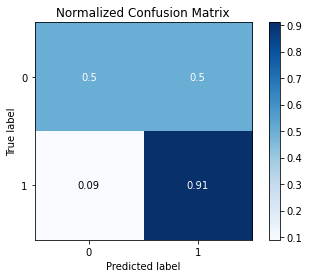

In [ ]:
# modelo final
modelo_lr.fit(X_train_rus, y_train_rus)

# Fazer a previsão com os dados de treino
y_pred_train = modelo_lr.predict(X_train_rus)

# Classification Report
print(classification_report(y_train_rus, y_pred_train))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_train_rus, y_pred_train)))

# plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_train_rus, y_pred_train, normalize=True);

Analisando o relatório de classificação para o modelo treinado com dados de treino, temos:

* Precisão = 65%
* Recall = 91%
* Calculando a área sob a curva (AUC) temos o resultado de 0.70.

Para sabermos se é conveniente fazer o trade-off entre Recall e Precisão, vamos plotar o gráfico da relação entre essas métricas, assim podemos identificar melhor o comportamento delas:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

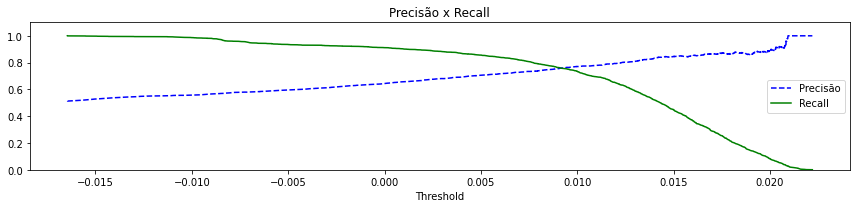

In [ ]:
# Determinando as scores para as funções de decisão
cv_skf = StratifiedKFold(n_splits = 10, shuffle = True)
y_scores = cross_val_predict(modelo_lr, X_train_rus, y_train_rus, cv=cv_skf, method='decision_function')

# Separando as scores
precision, recall, thresholds = precision_recall_curve(y_train_rus, y_scores)

# Plotando o gráfico de relação entre precisão e recall
fig, ax = plt.subplots(figsize=(12,3))

plt.plot(thresholds, precision[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recall[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.ylim([0,1.1])
plt.title('Precisão x Recall')

plt.tight_layout();
fig.savefig('precisao_x_recall')

Para o threshold padrão, temos um bom resultado para o `Recall` que é 0.91, e não seria muito conveniente perder mais em precisão que já está baixa, apenas 0.65.

Então optarei por não realizar um trade-off entre essas duas métricas, a fim de não aumentar o problema com os falsos positivos.

## Testando o Modelo

Agora é a hora de testar o modelo com os dados de teste, que foram preservados desde a fase de separação:

              precision    recall  f1-score   support

           0       0.94      0.49      0.64      1045
           1       0.38      0.91      0.54       364

    accuracy                           0.59      1409
   macro avg       0.66      0.70      0.59      1409
weighted avg       0.79      0.59      0.61      1409

AUC: 0.6964



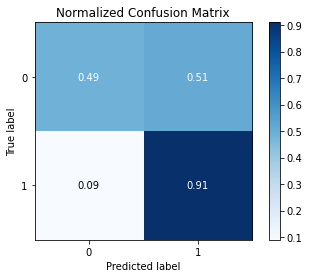

In [ ]:
# modelo final
modelo_lr.fit(X_train_rus, y_train_rus)

# fazer a previsão
X_test = mms.transform(X_test)
y_pred = modelo_lr.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True);

Com o relatório de classificação para o modelo final treinado com os dados de teste, temos:

* Precisão = 38%
* Recall = 91%
* Calculando a área sob a curva (AUC) temos o resultado de 0.69.

Nosso modelo então errará mais na previsão dos clientes que não seriam Churn, ou seja, que não iriam cancelar os serviços da empresa, mas errará muito menos para aqueles que realmente iriam cancelar os serviços.

Por exemplo, de 100 clientes apontados como Churn, dado nossa precisão, 62 destes não iriam cancelar os serviços e nosso modelo irá direcioná-los para fazer parte erroneamente das estratégias para retê-los. Agora de acordo com o Recall, de 100 clientes que realmente cancelariam os serviços, apenas 9 não passariam a fazer parte das estratégias.

# Conclusão

Infelizmente não é possível impedir que um cliente abandone o serviço ou produto de uma empresa, uma vez que sua saída pode ser algo que foge do controle do negócio, como por exemplo, acontece algo na vida pessoal do cliente e ele precisa cortar gastos, ou ele está sem tempo para aproveitar o serviço ou produto e opta pelo cancelamento, às vezes pode ser até algo provisório, mas em todos os casos, são fenômenos externos à empresa.

Já no âmbito interno, temos a possibilidade de prever baseado no perfil dos clientes, se ele irá cancelar ou não o serviço, e diante dessa previsão tomar as medidas corretas para manter a fidelidade deste cliente, o que foi comprovado neste projeto com o desenvolvimento de um modelo de Machine Learning.

Busquei extrair o ''melhor'' modelo, passando pelas etapas de tratamento, feature engineering, feature scaling, otimização dos hiperparâmetros, uso do método Ensemble para obter um modelo combinado, e fazendo uma análise de correlação entre precisão e recall.

O modelo final poderia ser diferente caso fossem utilizado outros métodos de validação ou mais aprofundamento em algumas etapas, porém para este projeto, como os resultados do modelo final ficaram próximos aos do modelo de treino, vamos adotá-lo como sendo um modelo satisfatório para prever o Churn.

Além da detecção de Churn, para resolver este tipo de problema é essencial uma boa equipe de Customer Success, para desenvolver estratégias de retenção de clientes.

Fica a recomendação de leitura do artigo publicado pela Resultados Digitais (2020), [Churn Rate: o que é e como reduzir para sua empresa crescer](https://resultadosdigitais.com.br/blog/o-que-e-churn/), excelente artigo que explica o conceitos de Churn e Customer Success.

# Referências

* https://resultadosdigitais.com.br/blog/o-que-e-churn/

* https://tiinside.com.br/20/09/2015/churn-prediction-como-ele-pode-alavancar-seu-negocio/
